## **SOLO LO HICE PARA PCA**

Lo hice para PCA en R2 y en R3

In [1]:
import pickle
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def unpickle(file_path):
    """Carga un archivo pickle de Python y devuelve el diccionario."""
    with open(file_path, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

cifar100_path = r"/home/heri/Documents/GitHub/Data-Mining/07-Reduccion-de-Dimensionalidad/02-Ejercicio/datos/cifar-10-batches-py"

In [3]:
# Carga de los datos de entrenamiento y metadatos
data_dict = unpickle(os.path.join(cifar100_path, 'data_batch_1'))
meta_dict  = unpickle(os.path.join(cifar100_path, 'batches.meta'))

In [4]:
meta_dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [5]:
clase1 = 'bird'
clase2 = 'automobile'
clase3 = 'cat'
clase4 = 'deer'

In [6]:
# Decodificar nombres de clases
fine_label_names = [name.decode('utf-8') for name in meta_dict[b'label_names']]

# Obtener los índices de las clases clase
idx_clase1 = fine_label_names.index(clase1)
idx_clase2 = fine_label_names.index(clase2)
idx_clase3 = fine_label_names.index(clase3)
idx_clase4 = fine_label_names.index(clase4)

In [7]:
# Convertir datos y etiquetas a numpy
data = data_dict[b'data']               # (50000, 3072)
labels = np.array(data_dict[b'labels'])

In [8]:
# Filtrar solo las muestras de clase1 y clase2
mask = np.isin(labels, [idx_clase1, idx_clase2, idx_clase3, idx_clase4])
X = data[mask]
y = labels[mask]

# **PCA R2**

In [9]:
# Pipeline: escalado + PCA
pipeline_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [10]:
# Ajustar PCA y transformar
X_pca_2= pipeline_2.fit_transform(X)

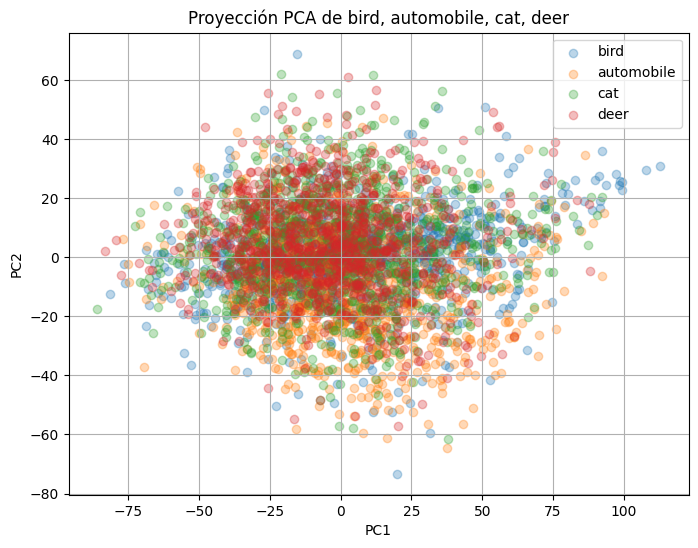

In [11]:
# Proyección PCA
plt.figure(figsize=(8,6))
# clase1
mask_1 = (y == idx_clase1)
plt.scatter(X_pca_2[mask_1, 0], X_pca_2[mask_1, 1], marker='o', label=clase1, alpha=0.3)
# clase2
mask_2 = (y == idx_clase2)
plt.scatter(X_pca_2[mask_2, 0], X_pca_2[mask_2, 1], marker='o', label=clase2, alpha=0.3)
# clase3
mask_3 = (y == idx_clase3)
plt.scatter(X_pca_2[mask_3, 0], X_pca_2[mask_3, 1], marker='o', label=clase3, alpha=0.3)
# clase4
mask_4 = (y == idx_clase4)
plt.scatter(X_pca_2[mask_4, 0], X_pca_2[mask_4, 1], marker='o', label=clase4, alpha=0.3)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Proyección PCA de {clase1}, {clase2}, {clase3}, {clase4}')
plt.legend()
plt.grid(True)
plt.show()

# **PCA R3**

In [12]:
# Pipeline: escalado + PCA
pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])

In [13]:
# Ajustar PCA y transformar
X_pca_3 = pipeline_3.fit_transform(X)

In [14]:
pipeline_3.named_steps['pca'].explained_variance_ratio_

array([0.27541728, 0.10415322, 0.0630143 ])

In [15]:
pipeline_3.named_steps['pca'].components_

array([[ 0.02250392,  0.02278428,  0.02296208, ...,  0.01990117,
         0.02003476,  0.01995699],
       [-0.01800164, -0.01844916, -0.0190394 , ...,  0.01584852,
         0.01477623,  0.01377621],
       [-0.014504  , -0.01471306, -0.01439154, ..., -0.01821478,
        -0.01785134, -0.01713971]])

In [16]:
fig = go.Figure()

# clase1
fig.add_trace(go.Scatter3d(
    x=X_pca_3[mask_1, 0],
    y=X_pca_3[mask_1, 1],
    z=X_pca_3[mask_1, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=clase1
))

# clase2
fig.add_trace(go.Scatter3d(
    x=X_pca_3[mask_2, 0],
    y=X_pca_3[mask_2, 1],
    z=X_pca_3[mask_2, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=clase2
))

# clase3
fig.add_trace(go.Scatter3d(
    x=X_pca_3[mask_3, 0],
    y=X_pca_3[mask_3, 1],
    z=X_pca_3[mask_3, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=clase3
))

# clase4
fig.add_trace(go.Scatter3d(
    x=X_pca_3[mask_4, 0],
    y=X_pca_3[mask_4, 1],
    z=X_pca_3[mask_4, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=clase4
))

fig.update_layout(
    title=f'Proyección PCA 3D de {clase1}, {clase2}, {clase3}, {clase4}',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Zoom out 
fig.update_layout(scene_camera=dict(eye=dict(x=2, y=2, z=2)))

# Cambiar el titulo
fig.update_layout(title_font=dict(size=20, color='black', family='Arial'))

fig.show()
